# Classification and Regression Trees(CART)

- Amaç veri içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.

- Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

1984, Breiman

--------

# 1. Model (CART)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")

df = hit.copy()

df = df.dropna()

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [5]:
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")

X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [6]:
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [7]:
y = df["Salary"]

y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [15]:
X_train_hits = pd.DataFrame(X_train["Hits"])
X_test_hits = pd.DataFrame(X_test["Hits"])

In [16]:
cart_model = DecisionTreeRegressor()

cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [17]:
cart_model.fit(X_train_hits, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

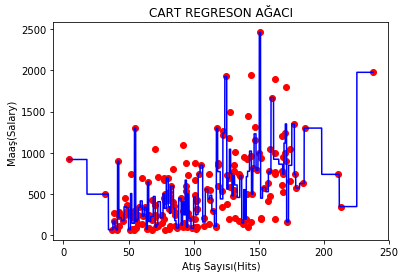

In [21]:
X_grid = np.arange(min(np.array(X_train_hits)), max(np.array(X_train_hits)), 0.01)

X_grid = X_grid.reshape((len(X_grid)), 1)

plt.scatter(X_train_hits, y_train, color = "red")
plt.plot(X_grid, cart_model.predict(X_grid), color = "blue")
plt.title("CART REGRESON AĞACI")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)");

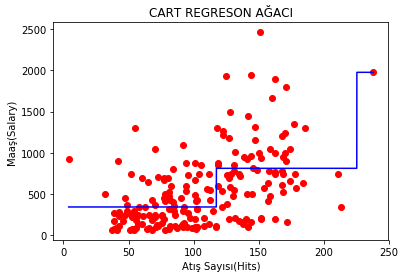

In [22]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 3)

cart_model.fit(X_train_hits, y_train)

X_grid = np.arange(min(np.array(X_train_hits)), max(np.array(X_train_hits)), 0.01)

X_grid = X_grid.reshape((len(X_grid)), 1)

plt.scatter(X_train_hits, y_train, color = "red")
plt.plot(X_grid, cart_model.predict(X_grid), color = "blue")
plt.title("CART REGRESON AĞACI")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)");

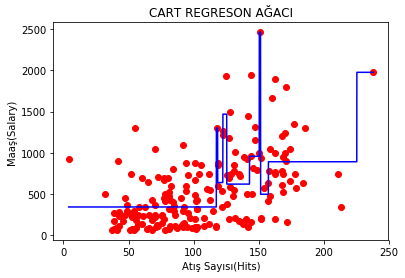

In [23]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

cart_model.fit(X_train_hits, y_train)

X_grid = np.arange(min(np.array(X_train_hits)), max(np.array(X_train_hits)), 0.01)

X_grid = X_grid.reshape((len(X_grid)), 1)

plt.scatter(X_train_hits, y_train, color = "red")
plt.plot(X_grid, cart_model.predict(X_grid), color = "blue")
plt.title("CART REGRESON AĞACI")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)");

In [25]:
!pip install skompiler

  Stored in directory: C:\Users\Sefa3\AppData\Local\pip\Cache\wheels\21\eb\99\6e32f89da503a823f6bc1a985abfdaeaa01b3a6b5ac5776d15
Successfully built skompiler


In [26]:
from skompiler import skompile

In [28]:
print(skompile(cart_model.predict).to("python/code"))   # karar ağacının karar modeli

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



---------

# 2. Tahmin (CART)

In [29]:
x = [91]

In [30]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [31]:
cart_model.predict(X_test_hits)

array([ 621.96792308,  958.61111111,  621.96792308,  345.20115517,
        345.20115517,  345.20115517,  892.54024138,  958.61111111,
        892.54024138,  345.20115517,  499.16666667,  621.96792308,
        345.20115517,  958.61111111,  345.20115517,  345.20115517,
        892.54024138,  345.20115517,  892.54024138,  345.20115517,
        345.20115517,  892.54024138,  345.20115517, 1468.52366667,
        892.54024138,  345.20115517,  499.16666667,  345.20115517,
        345.20115517,  345.20115517,  345.20115517,  345.20115517,
        345.20115517,  641.        ,  345.20115517,  345.20115517,
        958.61111111,  641.        ,  345.20115517,  345.20115517,
        345.20115517,  345.20115517,  641.        ,  345.20115517,
        621.96792308,  958.61111111,  345.20115517,  345.20115517,
       1300.        ,  892.54024138,  621.96792308,  345.20115517,
        892.54024138,  621.96792308,  345.20115517,  892.54024138,
        345.20115517,  345.20115517,  345.20115517,  621.96792

In [33]:
cart_model.predict([[91]])

array([345.20115517])

In [34]:
y_pred_test = cart_model.predict(X_test_hits)

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

486.34593105235456

-------

# 3. Model Doğrulama / Model Tuning (CART)

In [37]:
cart_model = DecisionTreeRegressor()

cart_model.fit(X_train_hits, y_train)

y_pred_test = cart_model.predict(X_test_hits)

np.sqrt(mean_squared_error(y_test, y_pred_test))

468.49579052913884

In [38]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 2)

cart_model.fit(X_train_hits, y_train)

y_pred_test = cart_model.predict(X_test_hits)

np.sqrt(mean_squared_error(y_test, y_pred_test))

462.4884294447576

In [39]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 5)

cart_model.fit(X_train_hits, y_train)

y_pred_test = cart_model.predict(X_test_hits)

np.sqrt(mean_squared_error(y_test, y_pred_test))

479.5201716052201

In [40]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

cart_model.fit(X_train_hits, y_train)

y_pred_test = cart_model.predict(X_test_hits)

np.sqrt(mean_squared_error(y_test, y_pred_test))

486.34593105235456

In [41]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 15)

cart_model.fit(X_train_hits, y_train)

y_pred_test = cart_model.predict(X_test_hits)

np.sqrt(mean_squared_error(y_test, y_pred_test))

455.8367349677217

In [42]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 15, min_samples_split = 10)

cart_model.fit(X_train_hits, y_train)

y_pred_test = cart_model.predict(X_test_hits)

np.sqrt(mean_squared_error(y_test, y_pred_test))

458.44092458608196

In [43]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 20, min_samples_split = 2)

cart_model.fit(X_train_hits, y_train)

y_pred_test = cart_model.predict(X_test_hits)

np.sqrt(mean_squared_error(y_test, y_pred_test))

446.72035850924783

In [45]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

cart_model.fit(X_train_hits, y_train)  # train

y_pred_train = cart_model.predict(X_train_hits)  # train

np.sqrt(mean_squared_error(y_train, y_pred_train))

231.67017321152872

In [50]:
cart_params = {"min_samples_split" : range(2, 100), 
         "max_leaf_nodes" : range(2, 100)}

In [51]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

cart_cv_model.fit(X_train_hits, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 100),
                         'min_samples_split': range(2, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sc

In [52]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [56]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

cart_tuned.fit(X_train_hits, y_train)

y_pred_test = cart_tuned.predict(X_test_hits)  # test için;

np.sqrt(mean_squared_error(y_test, y_pred_test))

423.406689243066

In [57]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

cart_tuned.fit(X_train_hits, y_train)

y_pred_train = cart_tuned.predict(X_train_hits)  # train için;

np.sqrt(mean_squared_error(y_train, y_pred_train))

359.2003873993075

In [61]:
cart_params = {"min_samples_split" : range(5, 90), 
               "max_leaf_nodes" : range(5, 90)}

cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': range(5, 90),
                         'min_samples_split': range(5, 90)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [66]:
# ilkel yöntem : bütün değişkenler

cart_tuned = DecisionTreeRegressor()

cart_tuned.fit(X_train, y_train)

y_pred_test = cart_tuned.predict(X_test)  # test için;

np.sqrt(mean_squared_error(y_test, y_pred_test))

460.3487757202701

In [67]:
cart_cv_model.best_params_

{'max_leaf_nodes': 52, 'min_samples_split': 37}

In [68]:
# final modelimiz : bütün değişkenler

cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 52, min_samples_split = 37)

cart_tuned.fit(X_train, y_train)

y_pred_test = cart_tuned.predict(X_test)  # test için;

np.sqrt(mean_squared_error(y_test, y_pred_test))

375.01595709815194

-------------